# Back Propagation으로 MNIST 구현

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# data 불러오기
train_data = np.loadtxt('C:/Users/user/Desktop/work/neowizard/MachineLearning/mnist_train.csv', delimiter=',', dtype=np.float32)
test_data = np.loadtxt('C:/Users/user/Desktop/work/neowizard/MachineLearning/mnist_test.csv', delimiter=',', dtype=np.float32)

print("train data shape = ", train_data.shape, "test data shape = ", test_data.shape)

train data shape =  (60000, 785) test data shape =  (10000, 785)


## train data에서 가장 첫 번째 이미지 출력해보기

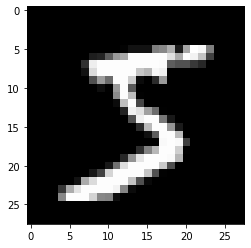

In [18]:
img = train_data[0][1:].reshape(28, 28)

plt.imshow(img, cmap='gray')
plt.show()

## 코드 구현
### External function

In [19]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### Neural Network class

In [20]:
class NeuralNetwork:
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # 은닉층 가중치 W2 = (784 * 100) Xavier/He 방법으로 초기화
        self.W2 = np.random.randn(self.input_nodes, self.hidden_nodes) / np.sqrt(self.input_nodes/2)
        self.b2 = np.random.rand(self.hidden_nodes)

        # 출력층 가중치 W3 = (100 * 10) Xavier/He 방법으로 초기화
        self.W3 = np.random.randn(hidden_nodes, output_nodes) / np.sqrt(self.hidden_nodes/2)
        self.b3 = np.random.rand(output_nodes)

        # 출력층 선형회귀 값 Z3, 출력값 A3 정의
        self.Z3 = np.zeros([1, output_nodes])
        self.A3 = np.zeros([1, output_nodes])

        # 은닉층 선형회귀 값 Z2, 출력값 A2 정의
        self.Z2 = np.zeros([1, hidden_nodes])
        self.A2 = np.zeros([1, hidden_nodes])

        # 입력층 선형회쉬 값 Z1, 출력값 A1 정의
        self.Z1 = np.zeros([1, input_nodes])
        self.A1 = np.zeros([1, input_nodes])

        # 학습률 초기화
        self.learning_rate = learning_rate

        print("Neural Network object is created!")
    
    def feed_forward(self):
        delta = 1e-7

        # 입력층 선형회귀 값 Z1, 출력값 A1 계산
        self.Z1 = self.input_data
        self.A1 = self.input_data

        # 은닉층 선형회귀 값 Z2, 출력값 A2 계산
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)

        # 출력층 선형회귀 값 Z3, 출력값 A3 계산
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = sigmoid(self.Z3)

        return -np.sum( self.target_data*np.log(self.A3 + delta) + (1-self.target_data)*np.log((1-self.A3)+delta) )

    def loss_val(self):
        delta = 1e-7

        self.Z1 = self.input_data
        self.A1 = self.input_data

        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)

        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = sigmoid(self.Z3)

        return -np.sum( self.target_data*np.log(self.A3 + delta) + (1-self.target_data)*np.log((1-self.A3)+delta) )

    def train(self, input_data, target_data):
        self.input_data = input_data
        self.target_data = target_data

        # 먼저 feed forward를 통해서 최종 출력값과 이를 바탕으로 현재의 에러 값 계산
        loss_val = self.feed_forward()

        # 출력층 loss인 loss_3 구하기
        loss_3 = (self.A3 - self.target_data)*(self.A3*(1-self.A3))

        # 출력층 가중치 W3, 출력층 바이어스 b3 업데이트
        self.W3 = self.W3 - self.learning_rate*np.dot(self.A2.T, loss_3)
        self.b3 = self.b3 - self.learning_rate*loss_3

        # 은닉층 loss인 loss_2 구하기
        loss_2 = np.dot(loss_3, self.W3.T) * self.A2 * (1-self.A2)

        # 은닉층 가중치 W2, 은닉층 바이어스 b2 업데이트
        self.W2 = self.W2 - self.learning_rate*np.dot(self.A1.T, loss_2)
        self.b2 = self.b2 - self.learning_rate*loss_2

    def predict(self, input_data):
        Z2 = np.dot(input_data, self.W2) + self.b2
        A2 = sigmoid(Z2)

        Z3 = np.dot(A2, self.W3) + self.b3
        A3 = sigmoid(Z3)

        predicted_num = np.argmax(A3)

        return predicted_num
    
    # 정확도 측정 함수
    def accuracy(self, test_data):
        matched_list = []
        not_matched_list = []

        for index in range(len(test_data)):
            label = int(test_data[index, 0])  # test_data의 1열에 있는 정답 분리

            # one-hot encoding을 위한 데이터 정규화 (data normalize)
            data = (test_data[index, 1:] / 255.0 * 0.99) + 0.01

            # predict를 위해서 vector를 matrix로 변환하여 인수로 넘겨준다
            predicted_num = self.predict(np.array(data, ndmin=2))

            if label == predicted_num:
                matched_list.append(index)
            else:
                not_matched_list.append(index)
            
        print("Current Accuracy = ", 100*(len(matched_list)/(len(test_data))), " %")

        return matched_list, not_matched_list

### Usage

In [21]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
learning_rate = 0.3
epochs = 5

nn = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

start_time = datetime.now()

for i in range(epochs):
    for step in range(len(train_data)):

        # input_data, target_data normalize
        target_data = np.zeros(output_nodes) + 0.01
        target_data[int(train_data[step, 0])] = 0.99

        input_data = ((train_data[step, 1:] / 255.0)*0.99) + 0.01

        nn.train(np.array(input_data, ndmin=2), np.array(target_data, ndmin=2))

        if step % 400 == 0:
            print("step = ", step, ",  loss_val = ", nn.loss_val())

end_time = datetime.now()

# 학습을 위해 수행한 총 시간 출력
print("\nElapsed time = ", end_time-start_time)

# 정확도 출력
(_matched_list, _not_matched_list) = nn.accuracy(test_data)

Neural Network object is created!
step =  0 ,  loss_val =  4.331931817992122
step =  400 ,  loss_val =  1.694810865293667
step =  800 ,  loss_val =  1.497335759690883
step =  1200 ,  loss_val =  0.7525061463059861
step =  1600 ,  loss_val =  0.9863757851813293
step =  2000 ,  loss_val =  1.110104975027212
step =  2400 ,  loss_val =  0.6951055240017249
step =  2800 ,  loss_val =  0.823179058325709
step =  3200 ,  loss_val =  0.750441818455847
step =  3600 ,  loss_val =  0.6988741203011237
step =  4000 ,  loss_val =  0.9020161382400932
step =  4400 ,  loss_val =  0.795068651953615
step =  4800 ,  loss_val =  0.7288046804568401
step =  5200 ,  loss_val =  1.1406339410708322
step =  5600 ,  loss_val =  1.0666401040068219
step =  6000 ,  loss_val =  0.8131935007500805
step =  6400 ,  loss_val =  0.8543070115906501
step =  6800 ,  loss_val =  0.9373144627016758
step =  7200 ,  loss_val =  0.8153872251029965
step =  7600 ,  loss_val =  0.917955893580041
step =  8000 ,  loss_val =  0.973258838

# 오차 역전파 공식
## [1] 출력층의 출력값과 정답(Target)을 이용하여, 출력층 손실 계산
- 출력층 손실 = (출력층 출력 - 정답) * 출력층 출력(1 - 출력층 출력)

## [2] 은닉층에서의 (가상의) 손실 loss_3, loss_2 등을 계산할 경우, 현재층(current layer), 이전층(previous layer), 다음층(next layer) 개념을 도입하여 동일한 패턴으로 반복 계산
- 은닉층의 현재층  손실 = (다음층 손실 · 다음층에 적용되는 가중치 W^T) * 현재층 출력(1 - 현재층 출력)

## [3] 계산된 각 층의 출력값과 손실값을 이용하여,
- 현재층의 바이어스 변화율 ∂E/∂b = 현재층 손실
- 현재층에 적용되는 가중치 변화율 ∂E/∂W = (이전층 출력)^T · 현재층 손실